<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Create-an-Experiment" data-toc-modified-id="Create-an-Experiment-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Create an Experiment</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#About-the-System" data-toc-modified-id="About-the-System-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>About the System</a></span></li></ul></li><li><span><a href="#Run-GROMACS-FDA" data-toc-modified-id="Run-GROMACS-FDA-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Run GROMACS FDA</a></span></li></ul></li><li><span><a href="#Parsing-PFA-File" data-toc-modified-id="Parsing-PFA-File-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Parsing PFA File</a></span><ul class="toc-item"><li><span><a href="#Averaged-Parsing" data-toc-modified-id="Averaged-Parsing-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Averaged Parsing</a></span></li></ul></li><li><span><a href="#Curvature" data-toc-modified-id="Curvature-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Curvature</a></span></li><li><span><a href="#Cluster" data-toc-modified-id="Cluster-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Cluster</a></span></li><li><span><a href="#Force" data-toc-modified-id="Force-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Force</a></span></li><li><span><a href="#MSD-and-Diffusion" data-toc-modified-id="MSD-and-Diffusion-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>MSD and Diffusion</a></span></li><li><span><a href="#Framewise-parsing-of-PFA" data-toc-modified-id="Framewise-parsing-of-PFA-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Framewise parsing of PFA</a></span></li><li><span><a href="#Lipid-Angles" data-toc-modified-id="Lipid-Angles-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Lipid Angles</a></span></li></ul></div>

In [1]:
from pyLFDA import LFDA
from IPython.display import SVG, display, Image, HTML

# Create an Experiment
the `LFDA()` class is central in running analysis on your simulations. \
\
Arguments:
-   `experiment_name` : Name of the experiment. Uses this to create a directory to store outputs in. If not specified time-stamp of experiment will be used.
-   `pdb_filename` : Path of the PDB file to be used.
-   `gro_filename` : Path of the GRO file to be used.
-   `trr_filename` : Path of the TRR file to be used.
-   `tpr_filename` : Path of the TPR file to be used.
-   `ndx_filename` : Path of the NDX file to be used.
-   `gfda_version` : Version of Gromacs FDA to be used. Creates a directory with the name to store it and uses it for further experiments. Currently, we support these cersions only - ['v2020.4-fda2.10.2', 'v2020.3-fda2.10.1', 'v2020.3-fda2.10', 'v2020-fda2.10', 'v2019.3-fda2.9.1', 'v2018.7-fda2.9.1']. 

In [2]:
#To do analysis, first we create an LFDA() object.
#It stores all files required to do the experiment.
#The argument names are self explanatory.
experiment = LFDA(experiment_name="lfda_het_aa", trr_filename="het-aa/step7_comb_no80.trr", tpr_filename="het-aa/step7_1.tpr", ndx_filename="het-aa/index.ndx", pdb_filename="het-aa/step7_1.pdb", gro_filename="het-aa/step7_1.gro", gfda_version="v2020.4-fda2.10.2")
#The specified version will automatically be downloaded and be used for any subsequent experiments if the files are run from the same directory.

Making MDA Universe from PDB and TRR file
Parsing GRO file to calculate numbers of atoms, atoms information and box vectors
/mnt/c/Users/bhava/Desktop/work/lfda/pyLFDA/het_memb/het-aa/step7_1.gro file parsed. with 155271 atoms in 0.954578161239624 seconds


### About the System
 - This is a heterogenous atomistic Martini System with the following molecules:
    - POPE: 144
    - POPC: 360
    - PSM: 18
    - POPS: 18
    - POPI: 60
    - SOD: 144
    - CLA: 66
    - TIP3: 25343

## Run GROMACS FDA
`run_fda()` create `.pfi` file and then generating a PFA file using GROMACS FDA. \
 \
 Arguments : 
   -   `group1` : 1st group selected
   -   `group2` : 2nd group selected
   -   `residue_list` : [group1, group2]
   -   `pfi_filename` : Name of the PFI file to be generated. It is inferred from the experiment class if None.
   -   `pfa_filename` : Name of the PFA file to be generated. It is inferred from the experiment class if None.

In [3]:
#Run GROMACS FDA to calculate pairwise forces.
#This command creates a .pfa file containing pairwise forces between atoms.
experiment.run_fda(group1="POPS", group2="POPC", residue_list=["POPS", "POPC"], pfa_filename="pfa_file.pfa")

Creating PFI file
/mnt/c/Users/bhava/Desktop/work/lfda/pyLFDA/het_memb/lfda_het_aa/pfi_Jan-05-2022_2223.pfi file created in 0.011579751968383789 seconds 
Running Gromacs FDA
ResidueRenumber: auto
Vector2Scalar: norm
Pairwise interactions selected: all
Pairwise forces for groups: POPS and POPC


       :-) GROMACS - gmx mdrun, 2020.4-dev-20201029-4b5790511-unknown (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project

Binary mode: 0
Threshold: 1e-10
Normalize punctual stress per residue: 0
Ignore missing potentials: 1



Back Off! I just backed up traj.trr to ./#traj.trr.10#

Back Off! I just backed up ener.edr to ./#ener.edr.10#


starting md rerun 'Title', reading coordinates from input trajectory '/mnt/c/Users/bhava/Desktop/work/lfda/pyLFDA/het_memb/het-aa/step7_comb_no80.trr'

trr version: GMX_trn_file (single precision)
Reading frame    1500 time 151000.000   

GMX RUN completed in 11941.354944229126 seconds
/mnt/c/Users/bhava/Desktop/work/lfda/pyLFDA/het_memb/lfda_het_aa/pfa_file.pfa PFA file is generated in /mnt/c/Users/bhava/Desktop/work/lfda/pyLFDA/het_memb/lfda_het_aa




               Core t (s)   Wall t (s)        (%)
       Time:    11911.247    11911.262      100.0
                         3h18:31
                 (ns/day)    (hour/ns)
Performance:        0.000          inf

GROMACS reminds you: "Our struggle today is not to have a female Einstein get appointed as an assistant professor. It is for a woman schlemiel to get as quickly promoted as a male schlemiel." (Bella Abzug)



In [4]:
#Running GROMACS FDA can be a time consuming process.
#If you want to continue experimenting on a .pfa file you had previously generated.
#you can just load it and continue working.
#you dont need to run `run_fda()` if you load your .pfa file.
experiment.load_pfa(pfa_filename="lfda_het_aa/pfa_file.pfa", group1="POPS", group2="POPC", residue_list=["POPS", "POPC"])

Loading PFA file generated by Gromacs FDA


# Parsing PFA File
The `.pfa` file generated by GROMACS FDA is parsed for further analyses. The file can be parsed in two ways depending on your use case. 
 - `Average Parsing` - Allows for calculation of averaged properties over all frames. set `mode` argument to `average`.
 - `Framewise Parsing` - Allows for calculation of either properties for a specific frame or for a moving window over all frames. set `mode` argument to `framewise`.


## Averaged Parsing

In [5]:
#The .pfa file created, is parsed as average or framewise.
experiment.framewise=False #we specify that we need to parse pfa as average.
experiment.parse_pfa(file_name="generated_pfa_average.pfa")

Parsing PFA file as average
Parsed PFA file /mnt/c/Users/bhava/Desktop/work/lfda/pyLFDA/het_memb/lfda_het_aa/generated_pfa_average.pfa created with 155271 atoms in 8260.70097541809 seconds
Summed PFA file parsed in 0.21112513542175293 seconds


In [6]:
#Parsing .pfa can also be time consuming.
#You can just load the parsed .pfa to continue experimenting.
#The generated pfa file should be parsed as average to further parse it as average and similarly for framewise.
#using this function in "average" mode automatically sets "experiment.framewise" to "False".
experiment.parse_parsed_pfa(file_name="lfda_het_aa/generated_pfa_average.pfa", mode="average", group1="POPS", group2="POPC", residue_list=["POPS","POPC"])

Loading Average parsed PFA file
Summed PFA file parsed in 0.297621488571167 seconds


# Curvature 
This function generates curvature plots using MDAnalysis and displays them along with pairwise forces of the selected groups and the angle they make with the z-axis. \
\
Arguments: 
 - `specific_frame`: (int) Frame to calculate forces for. default: None.
 - `window`: (int) Moving Window size. default: None.
 - `num_x_bins`: (int) Number of bins in x-direction. default: 10.
 - `num_y_bins`: (int) Number of bins in y-direction. default: 10.
 - `split`: (bool) Split Calculations into Upper and Lower Membranes. default: False

In [7]:
#Generate curavture plots
experiment.curvature()

MDAnalysis.analysis.base: INFO     Choosing frames to analyze
MDAnalysis.analysis.base: INFO     Choosing frames to analyze
MDAnalysis.analysis.base: INFO     Starting preparation
MDAnalysis.analysis.base: INFO     Starting preparation


Creating curvature plot


MDAnalysis.analysis.base: INFO     Finishing up
MDAnalysis.analysis.base: INFO     Finishing up


In [8]:
#visualise curvature plots
display(HTML(f'<img src="lfda_het_aa/curvature_averaged_10_10_P.svg""></img>'))

In [9]:
#Splitting the curavture into upper and lower membrane.
experiment.curvature(split=True)

Creating curvature plot


MDAnalysis.analysis.base: INFO     Choosing frames to analyze
MDAnalysis.analysis.base: INFO     Choosing frames to analyze
MDAnalysis.analysis.base: INFO     Starting preparation
MDAnalysis.analysis.base: INFO     Starting preparation
MDAnalysis.analysis.base: INFO     Finishing up
MDAnalysis.analysis.base: INFO     Finishing up
MDAnalysis.analysis.base: INFO     Choosing frames to analyze
MDAnalysis.analysis.base: INFO     Choosing frames to analyze
MDAnalysis.analysis.base: INFO     Starting preparation
MDAnalysis.analysis.base: INFO     Starting preparation
MDAnalysis.analysis.base: INFO     Finishing up
MDAnalysis.analysis.base: INFO     Finishing up


In [10]:
display(HTML(f'<img src="lfda_het_aa/curvature_averaged_10_10_P_Upper.svg""></img>'))

In [11]:
display(HTML(f'<img src="lfda_het_aa/curvature_averaged_10_10_P_Lower.svg""></img>'))

# Cluster 
This function clusters the selected residues. \
\
Arguments:
 - `attached_ligands`: (str) Ligand 1 to be clustered. default: group 1 previously selected("POPS" in this example).
 - `lipids_to_cluster`: (str) Ligand 2 to be clustered. default: group 2 previously selected("POPC" in this example).
 - `protein_residue_names`: (list) All residues except for attached_ligands and lipids_to_cluster.
 - `box_side_length`: (int) Length of a box size. default: 6.

In [12]:
experiment.cluster(lipids_to_cluster="POPS", attached_ligands="POPC")

Making clutering plots


In [13]:
display(HTML(f'<img src="lfda_het_aa/cluster_POPS_POPC.svg""></img>'))

In [14]:
experiment.cluster(lipids_to_cluster="POPS", mode="single")

Making clutering plots


In [15]:
display(HTML(f'<img src="lfda_het_aa/cluster_POPS_POPC.svg""></img>'))

# Force 
This function calculates the pairwise force between selected groups 1 and 2. \
\
Arguments: 
 - `specific_frame`: (int) Frame to calculate forces for. default: None.
 - `window`: (int) Moving Window size. default: None.

In [16]:
experiment.force_graph()

Creating average force plot
Average Force plots created and saved


In [17]:
display(HTML(f'<img src="lfda_het_aa/force_averaged_POPS_POPC.svg""></img>'))

# MSD and Diffusion
This function calculates MSD values and calculates the diffusion coefficient using MDAnalyses.

In [18]:
experiment.msd()

MDAnalysis.analysis.base: INFO     Choosing frames to analyze
MDAnalysis.analysis.base: INFO     Choosing frames to analyze
MDAnalysis.analysis.base: INFO     Starting preparation
MDAnalysis.analysis.base: INFO     Starting preparation


Calculating diffusion coefficient


MDAnalysis.analysis.base: INFO     Finishing up
MDAnalysis.analysis.base: INFO     Finishing up


Diffution coefficient and MSD plotted


In [19]:
display(HTML(f'<img src="lfda_het_aa/MSD.svg""></img>'))

# Framewise parsing of PFA
This section illustrates how to generate framewise and moving window plots.

In [20]:
#The .pfa file created, is parsed asframewise.
experiment.framewise = True
experiment.parse_pfa(file_name="generated_pfa_framewise.pfa")

Parsing PFA file as framewise
Parsed PFA file /mnt/c/Users/bhava/Desktop/work/lfda/pyLFDA/het_memb/lfda_het_aa/generated_pfa_framewise.pfa created with 155271 atoms in 8379.448315143585 seconds
Summed PFA file parsed in 915.2075605392456 seconds


In [21]:
#using this function in "average" mode automatically sets "experiment.framewise" to "True".
experiment.parse_parsed_pfa(file_name="lfda_het_aa/generated_pfa_framewise.pfa", mode="framewise", group1="POPS", group2="POPC", residue_list=["POPS","POPC"])

Loading Framewise parsed PFA file
Summed PFA file parsed in 369.3622009754181 seconds


In [22]:
#create curvature plots for the 50th frame
experiment.curvature(specific_frame=50)

Creating curvature plot for frame 50


MDAnalysis.analysis.base: INFO     Choosing frames to analyze
MDAnalysis.analysis.base: INFO     Choosing frames to analyze
MDAnalysis.analysis.base: INFO     Starting preparation
MDAnalysis.analysis.base: INFO     Starting preparation
MDAnalysis.analysis.base: INFO     Finishing up
MDAnalysis.analysis.base: INFO     Finishing up


In [23]:
#visualise the plots
display(HTML(f'<img src="lfda_het_aa/curvature_framewise_10_10_P_50.svg""></img>'))

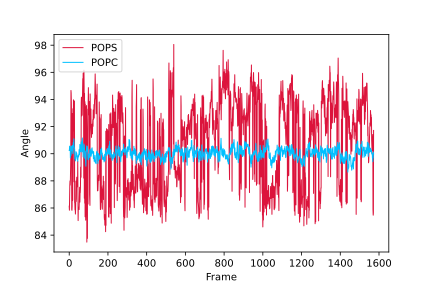

In [24]:
display(HTML(f'<img src="lfda_het_aa/curvature_framewise_angles_framewise.svg""></img>'))

In [25]:
#create curvature plots for a moving window of size 100. Plots created are for the windows 0-100, 100-200 and so on for our case.
experiment.curvature(window=100)

Creating 100 window size curvature plots


MDAnalysis.analysis.base: INFO     Choosing frames to analyze
MDAnalysis.analysis.base: INFO     Choosing frames to analyze
MDAnalysis.analysis.base: INFO     Starting preparation
MDAnalysis.analysis.base: INFO     Starting preparation
MDAnalysis.analysis.base: INFO     Finishing up
MDAnalysis.analysis.base: INFO     Finishing up


In [26]:
display(HTML(f'<img src="lfda_het_aa/curvature_moving_window_10_10_P_window_500_600.svg""></img>'))

In [27]:
display(HTML(f'<img src="lfda_het_aa/curvature_moving_window_angles_windowed_100.svg""></img>'))

In [28]:
#create force plots for the 50th frame
experiment.force_graph(specific_frame=50)

Creating framewise average force plot
Force plots created and saved for frame - 50


In [29]:
#visualise the plots
display(HTML(f'<img src="lfda_het_aa/force_specific_frame_POPS_50.svg""></img>'))

In [30]:
display(HTML(f'<img src="lfda_het_aa/force_specific_frame_POPC_50.svg""></img>'))

In [31]:
#create force plots for a moving window of size 20.
experiment.force_graph(window=100)

Creating framewise average force plot
Force plots created and saved for moving window of size - 100


In [32]:
display(HTML(f'<img src="lfda_het_aa/force_moving_window_POPC_400_to_500.svg""></img>'))

In [33]:
display(HTML(f'<img src="lfda_het_aa/force_moving_window_POPS_400_to_500.svg""></img>'))

In [34]:
#Create new PDB files with bFactor Loaded.
experiment.bfactor_pdb(bfactor_pdb_filename="bfactor_pdb_combined", mode="combined")

Loading a new PDB file with bFactor
PDB with BFactor values created in 32.759814500808716 seconds


In [35]:
experiment.bfactor_pdb(bfactor_pdb_filename="bfactor_pdb_atomwise", mode="atomwise")

Loading a new PDB file with bFactor
PDB with BFactor values created in 31.09873628616333 seconds


# Lipid Angles

This function calculates the angle between the vector of the selected lipids and the z-axis. The vector is defined between the P atom and the specified atom. The function allows you to calculate the angle individually for each lipid or group them together to calculate the average angle. \
\
Arguments: 
 - `selection`: (list) List of lipids for which the angle has to be calculated.
 - `grouping`: ('combine'/'individual') Whether to group the selected lipids or keep them individual.
 - `c_atom_name`: (str) Name of the atom to which the lipid vector is to be defined. default: 'C4B'.

In [36]:
#Lipid angles grouped indivudally with vector defined as P -> C4B
experiment.angles(selection=['POPC', 'POPS', 'POPE', 'PSM'], grouping = 'individual', c_atom_name = 'C4B')

Calculating lipid angles with vector as P -> C4B


In [37]:
display(HTML(f'<img src="lfda_het_aa/angles_framewise_P_to_C4B_POPC_POPS_POPE_PSM.svg""></img>'))

In [38]:
#Lipid angles grouped indivudally and spllt into Upper and Lower Membranes, with vector defined as P -> C4B
experiment.angles(selection=['POPC', 'POPS', 'POPE', 'PSM'], grouping = 'individual', c_atom_name = 'C4B', split = True)

Calculating lipid angles with vector as P -> C4B


In [39]:
display(HTML(f'<img src="lfda_het_aa/angles_framewise_P_to_C4B_POPC_POPS_POPE_PSM_Upper.svg""></img>'))

In [40]:
display(HTML(f'<img src="lfda_het_aa/angles_framewise_P_to_C4B_POPC_POPS_POPE_PSM_Lower.svg""></img>'))

In [41]:
#Lipid angles grouped with vector defined as P -> C4B
experiment.angles(selection=['POPC', 'POPS', 'POPE', 'PSM'], grouping = 'combine', c_atom_name = 'C4B')

Calculating lipid angles with vector as P -> C4B


In [42]:
display(HTML(f'<img src="lfda_het_aa/angles_framewise_combined_P_to_C4B.svg""></img>'))